In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)    #显示所有列
pd.set_option('display.max_rows', 30)    #显示所有行
pd.set_option('max_colwidth',100)    #设置value的显示长度为100，默认为50

import warnings
warnings.filterwarnings("ignore")

import  seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
all_data = pd.read_csv(r'D:\MyData\chenpf8\TianChi_Data\01_Introduction to Financial risk control - Loan default prediction\all_data.csv' ,
                   encoding='UTF-8', index_col=0,header=0)
all_data.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,n0,n1,n2,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.0,5,3.0,3.0,3,21,0.0,0,2,3.0,2,0,1.0,3,1.0,0.0,3.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,5,3.0,2.0,4,16,3.0,2,0,1.0,2,0,1.0,2,3.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,5,3.0,1.0,4,17,2.0,3,0,2.0,2,0,2.0,1,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3,0.0,1.0,7,3,2.0,4,1,3.0,1,1,1.0,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3,2.0,0.0,5,11,0.0,0,1,0.0,2,3,2.0,2,3.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
all_data.shape

(1000000, 41)

###  可以尝试 进一步做特征工程

In [3]:
ntrain = 800000
ntest = 200000
ntrainA = pd.read_csv(r'D:\MyData\chenpf8\TianChi_Data\01_Introduction to Financial risk control - Loan default prediction\trainA_data.csv' ,
                   encoding='UTF-8', index_col=0,header=0)
ntrainA.head()

,isDefault
id,
0,1
1,0
2,0
3,0
4,0


In [4]:
train_data = all_data[:ntrain]
train_data = pd.concat((train_data,ntrainA),axis=1)
train_data.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,n0,n1,n2,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,isDefault
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.0,5,3.0,3.0,3,21,0.0,0,2,3.0,2,0,1.0,3,1.0,0.0,3.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2.0,5,3.0,2.0,4,16,3.0,2,0,1.0,2,0,1.0,2,3.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,5,3.0,1.0,4,17,2.0,3,0,2.0,2,0,2.0,1,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,3,0.0,1.0,7,3,2.0,4,1,3.0,1,1,1.0,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,3,2.0,0.0,5,11,0.0,0,1,0.0,2,3,2.0,2,3.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
train_data.shape

(800000, 42)

In [5]:
test_data = all_data[ntrain:]
test_data.shape

(200000, 41)

##  开始探索（基于train_data）

In [ ]:
'''
Field	Description
id	为贷款清单分配的唯一信用证标识
loanAmnt	贷款金额
term	贷款期限（year）
interestRate	贷款利率
installment	分期付款金额
grade	贷款等级
subGrade	贷款等级之子级
employmentTitle	就业职称
employmentLength	就业年限（年）
homeOwnership	借款人在登记时提供的房屋所有权状况
annualIncome	年收入
verificationStatus	验证状态
issueDate	贷款发放的月份
purpose	借款人在贷款申请时的贷款用途类别
postCode	借款人在贷款申请中提供的邮政编码的前3位数字
regionCode	地区编码
dti	债务收入比
delinquency_2years	借款人过去2年信用档案中逾期30天以上的违约事件数
ficoRangeLow	借款人在贷款发放时的fico所属的下限范围
ficoRangeHigh	借款人在贷款发放时的fico所属的上限范围
openAcc	借款人信用档案中未结信用额度的数量
pubRec	贬损公共记录的数量
pubRecBankruptcies	公开记录清除的数量
revolBal	信贷周转余额合计
revolUtil	循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额
totalAcc	借款人信用档案中当前的信用额度总数
initialListStatus	贷款的初始列表状态
applicationType	表明贷款是个人申请还是与两个共同借款人的联合申请
earliesCreditLine	借款人最早报告的信用额度开立的月份
title	借款人提供的贷款名称
policyCode	公开可用的策略_代码=1新产品不公开可用的策略_代码=2
n系列匿名特征	匿名特征n0-n14，为一些贷款人行为计数特征的处理
'''

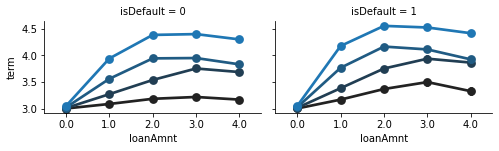

In [11]:
grid = sns.FacetGrid(train_data,  col='isDefault', size=2.2, aspect=1.6)
grid.map(sns.pointplot,'loanAmnt','term' ,'interestRate')


###  特征工程有时间再做吧。。

###  先跑一跑。。

In [6]:
X_train = train_data.drop("isDefault", axis=1)
Y_train = train_data["isDefault"]
X_test  = test_data.copy()
X_train.shape, Y_train.shape, X_test.shape

((800000, 41), (800000,), (200000, 41))

In [15]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.24

In [17]:
X_train.columns

Index(['loanAmnt', 'term', 'interestRate', 'installment', 'grade', 'subGrade',
       'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome',
       'verificationStatus', 'purpose', 'postCode', 'regionCode', 'dti',
       'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc',
       'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'title', 'n0', 'n1', 'n2', 'n4',
       'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [20]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
32,n6,0.259786
1,term,0.250876
40,n14,0.220930
8,homeOwnership,0.151673
14,dti,0.119839
...,...,...
24,initialListStatus,-0.081438
21,revolBal,-0.090844
4,grade,-0.106118
9,annualIncome,-0.112982


In [11]:
# Support Vector Machines

svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
          class_weight=None, verbose=False, max_iter=250, decision_function_shape=None,random_state=None)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

77.16

###  SVC 用时间太久了

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', 
                        algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, 
                        n_jobs=None)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

###   KNN也要跑很久。。

In [8]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

74.07

In [9]:
# Perceptron  感知机

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.39

In [10]:
# Linear SVC  线性SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.05

In [11]:
# Stochastic Gradient Descent  随机梯度下降

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.05

In [12]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.99

In [13]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.99

In [16]:
#  GBDT

GBoost = GradientBoostingClassifier()
GBoost.fit(X_train, Y_train)
Y_pred = GBoost.predict(X_test)
GBoost.score(X_train, Y_train)
acc_GBoost = round(GBoost.score(X_train, Y_train) * 100, 2)
acc_GBoost

80.38

In [17]:
xgb = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, Y_train)
acc_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
acc_xgb

[10:56:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




80.51

In [18]:
lgb = lgb.LGBMClassifier()
lgb.fit(X_train, Y_train)
Y_pred = lgb.predict(X_test)
lgb.score(X_train, Y_train)
acc_lgb = round(lgb.score(X_train, Y_train) * 100, 2)
acc_lgb

80.47

In [23]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','GBDT','xgb','lgb'],
    'Score': [acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_GBoost,acc_xgb,acc_lgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,99.99
6,Decision Tree,99.99
8,xgb,80.51
9,lgb,80.47
7,GBDT,80.38
0,Logistic Regression,80.24
4,Stochastic Gradient Decent,80.05
5,Linear SVC,80.05
3,Perceptron,78.39
2,Naive Bayes,74.07


###  采用 randomForest  提交试一下

In [24]:
Y_pred = random_forest.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
test_data.index

Int64Index([800000, 800001, 800002, 800003, 800004, 800005, 800006, 800007,
            800008, 800009,
            ...
            999990, 999991, 999992, 999993, 999994, 999995, 999996, 999997,
            999998, 999999],
           dtype='int64', name='id', length=200000)

In [32]:
sub = pd.DataFrame()
sub['id'] = test_data.index
sub['isDefault'] = Y_pred
sub.head()

,id,isDefault
0,800000,0
1,800001,0
2,800002,0
3,800003,0
4,800004,0


In [33]:
sub.to_csv('submission.csv',index=False)

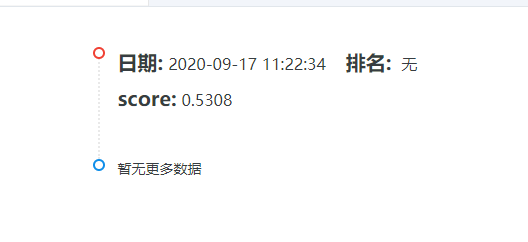

###  可以发现，过拟合了。。

In [34]:
Y_pred = lgb.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
sum(Y_pred)

5349

In [36]:
sub = pd.DataFrame()
sub['id'] = test_data.index
sub['isDefault'] = Y_pred
sub.to_csv('submission_lgb.csv',index=False)